In [7]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

In [8]:
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

#### Code 14.1

In [9]:
pancake = np.array([[1,1],[1,0],[0,0]])
# simulate a pancake and return randomly ordered sides
pancakes = np.asarray([np.random.permutation(pancake[np.random.choice(range(3))]) for i in range(10000)])
up = pancakes[:, 0]
down = pancakes[:, 1]
# compute proportion 1/1 (BB) out of all 1/1 and 1/0
num_11_10 = np.sum(up==1)
num_11 = np.sum((up==1) & (down==1))
num_11/num_11_10

0.6681266175592275

#### Code 14.2

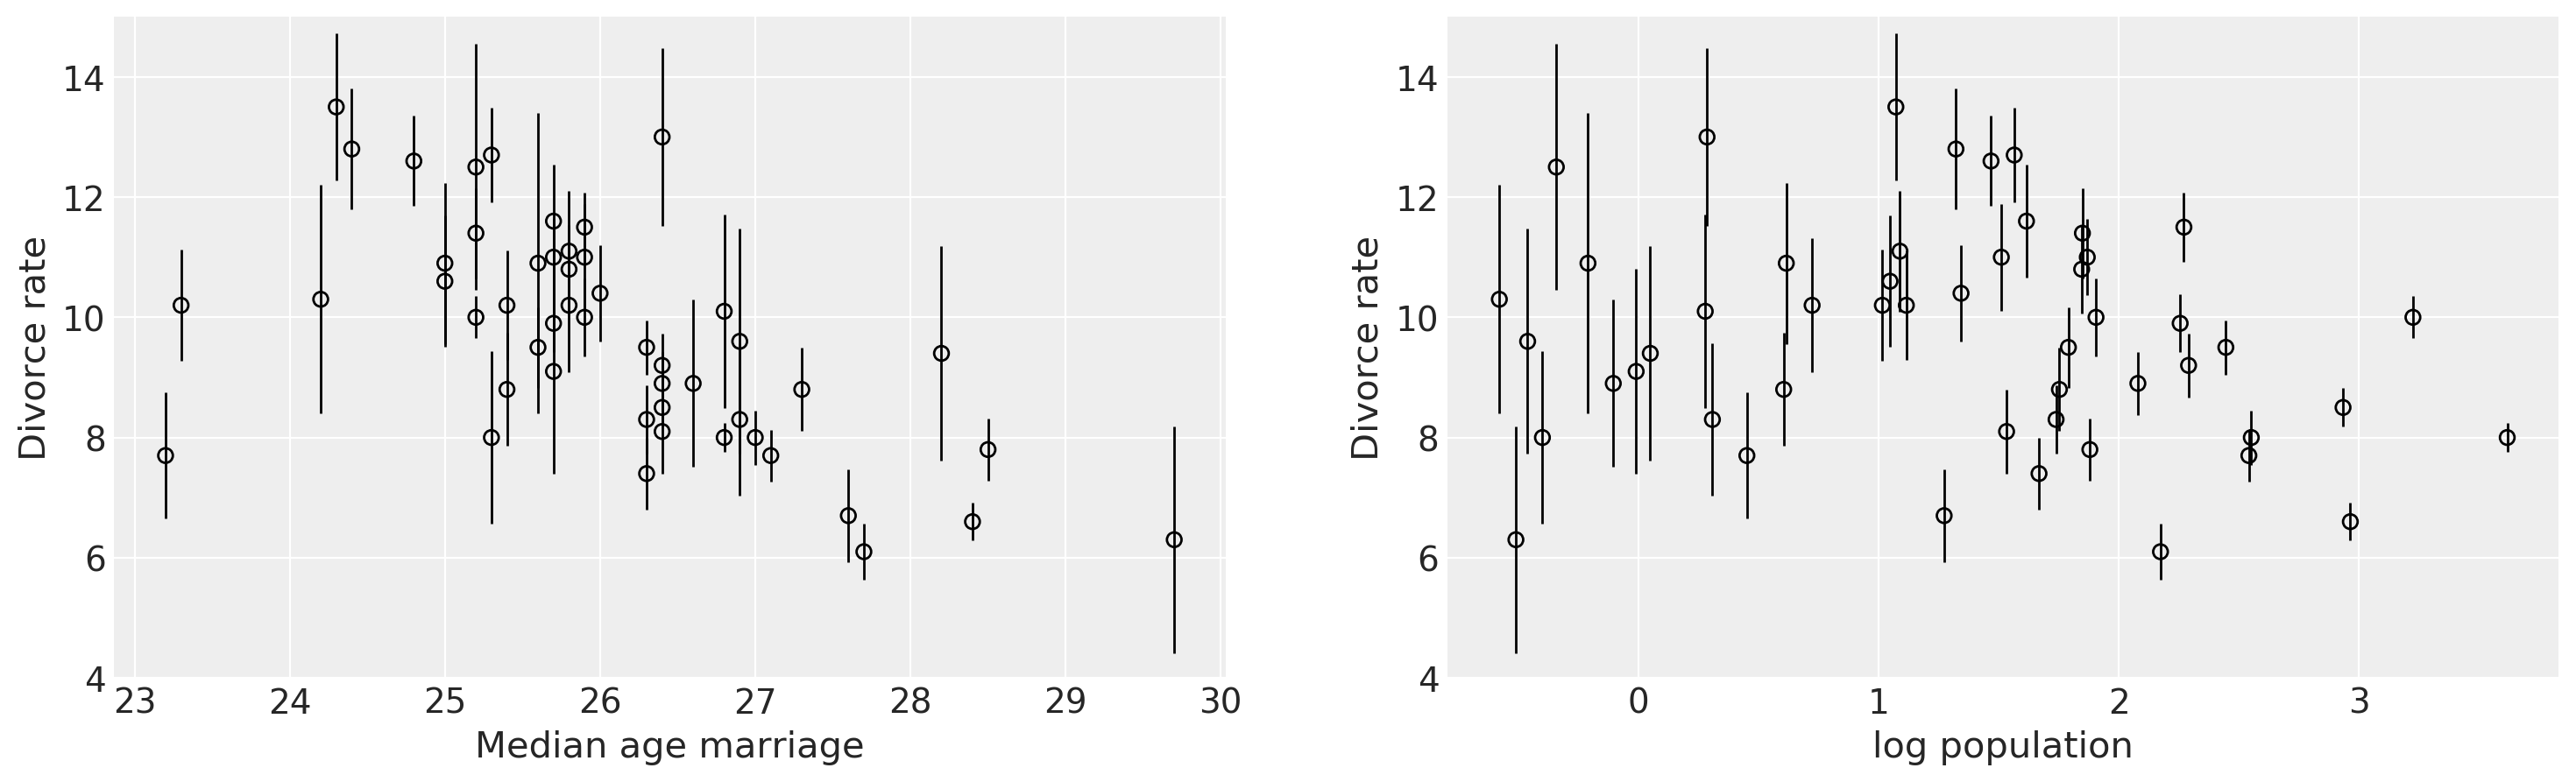

In [10]:
d = pd.read_csv('Data/WaffleDivorce.csv', ';')
d['log_population'] = np.log(d['Population'])

_, ax = plt.subplots(1, 2, figsize=(18, 5))

# points
ax[0].scatter(d['MedianAgeMarriage'], d['Divorce'], marker='o', facecolor='none', edgecolors='k', linewidth=1)
# standard errors
ax[0].errorbar(d['MedianAgeMarriage'], d['Divorce'], d['Divorce SE'].values, ls='none', color='k', linewidth=1)
ax[0].set_xlabel('Median age marriage')
ax[0].set_ylabel('Divorce rate')
ax[0].set_ylim(4, 15)

# points
ax[1].scatter(d['log_population'], d['Divorce'], marker='o', facecolor='none', edgecolors='k', linewidth=1)
# standard errors
ax[1].errorbar(d['log_population'], d['Divorce'], d['Divorce SE'].values, ls='none', color='k', linewidth=1)
ax[1].set_xlabel('log population')
ax[1].set_ylabel('Divorce rate')
ax[1].set_ylim(4, 15);

#### Code 14.3

In [12]:
div_obs = d['Divorce'].values
div_sd = d['Divorce SE'].values
R = d['Marriage'].values
A = d['MedianAgeMarriage'].values
N = len(d)

with pm.Model() as m_14_1:
    sigma = pm.HalfCauchy('sigma', 2.5)
    a = pm.Normal('a', 0., 10.)
    bA = pm.Normal('bA', 0., 10.)
    bR = pm.Normal('bR', 0., 10.)
    mu = a + bA*A + bR*R
    div_est = pm.Normal('div_est', mu, sigma, shape=N)
    obs = pm.Normal('div_obs', div_est, div_sd, observed=div_obs)
    # start value and additional kwarg for NUTS
    start = dict(div_est=div_obs)
    trace_14_1 = pm.sample(4000, tune=1000, 
                           start=start, nuts_kwargs=dict(target_accept=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [div_est, bR, bA, a, sigma]


#### Code 14.4

In [13]:
az.summary(trace_14_1, var_names=['div_est', 'a', 'bA', 'bR', 'sigma'], round_to=2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
div_est[0],11.79,0.70,10.53,13.16,0.01,0.01,9026.28,8941.01,9027.27,6343.68,1.0
div_est[1],11.19,1.07,9.14,13.14,0.01,0.01,10829.84,10546.30,10842.93,5510.56,1.0
div_est[2],10.48,0.63,9.32,11.66,0.01,0.00,11551.07,11481.57,11521.66,5807.90,1.0
div_est[3],12.31,0.86,10.65,13.87,0.01,0.01,8551.67,8523.86,8546.15,5842.11,1.0
div_est[4],8.05,0.24,7.61,8.50,0.00,0.00,14858.10,14858.10,14882.65,6162.65,1.0
div_est[5],11.01,0.74,9.69,12.47,0.01,0.01,9554.19,9326.70,9685.27,6081.38,1.0
div_est[6],7.24,0.64,6.13,8.56,0.00,0.00,16592.27,16473.15,16639.01,5937.91,1.0
div_est[7],9.35,0.89,7.77,11.09,0.01,0.01,8745.57,8745.57,8792.28,5742.22,1.0
div_est[8],7.00,1.08,4.92,8.98,0.01,0.01,7401.54,7387.06,7392.14,6042.32,1.0
div_est[9],8.54,0.31,7.99,9.14,0.00,0.00,12513.44,12498.69,12515.03,6320.29,1.0


#### Code 14.5

In [14]:
div_obs = d['Divorce'].values
div_sd = d['Divorce SE'].values
mar_obs = d['Marriage'].values
mar_sd = d['Marriage SE'].values
A = d['MedianAgeMarriage'].values
N = len(d)

with pm.Model() as m_14_2:
    sigma = pm.HalfCauchy('sigma', 2.5)
    a = pm.Normal('a', 0., 10.)
    bA = pm.Normal('bA', 0., 10.)
    bR = pm.Normal('bR', 0., 10.)
    mar_est = pm.Flat('mar_est', shape=N)
    mu = a + bA*A + bR*mar_est
    div_est = pm.Normal('div_est', mu, sigma, shape=N)
    obs1 = pm.Normal('div_obs', div_est, div_sd, observed=div_obs)
    obs2 = pm.Normal('mar_obs', mar_est, mar_sd, observed=mar_obs)
    # start value and additional kwarg for NUTS
    start = dict(div_est=div_obs, mar_est=mar_obs)
    trace_14_2 = pm.sample(4000, tune=1000, 
                           start=start, nuts_kwargs=dict(target_accept=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [div_est, mar_est, bR, bA, a, sigma]


There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


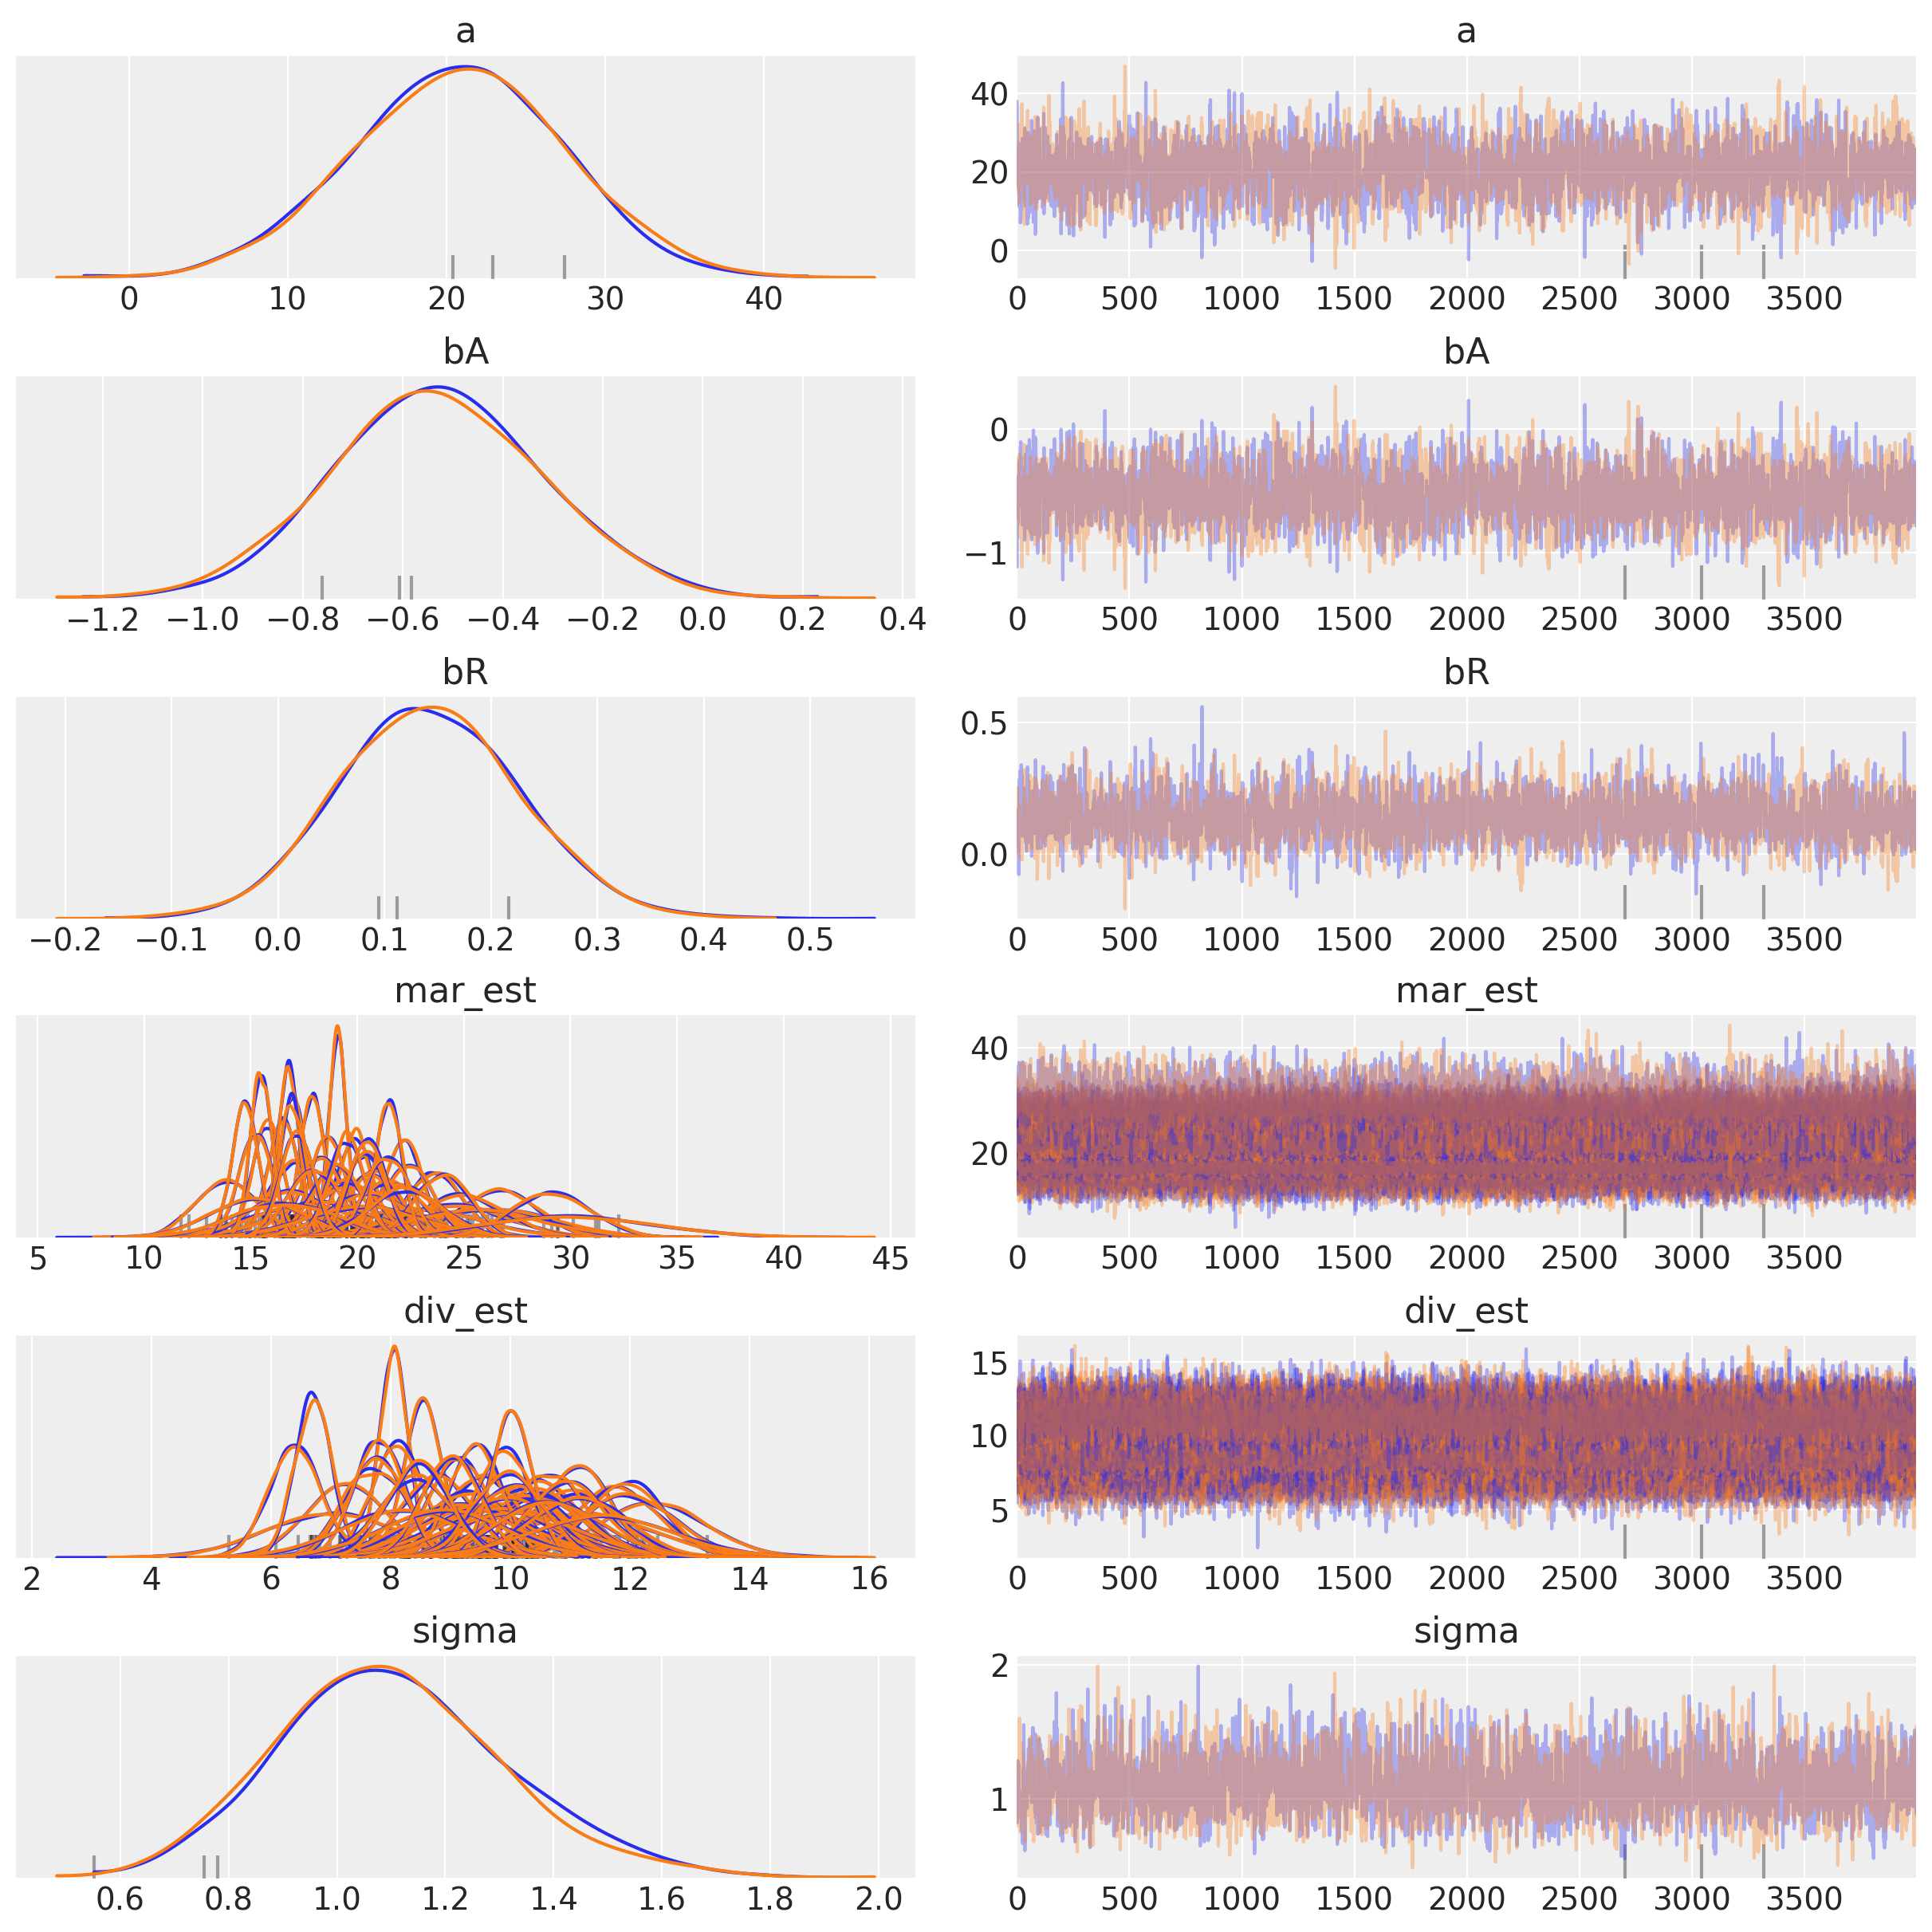

In [15]:
az.plot_trace(trace_14_2, compact=True);

#### Code 14.6

In [16]:
d = pd.read_csv('Data/milk.csv', ';')
d.loc[:,'neocortex.prop'] = d['neocortex.perc'] / 100
d.loc[:,'logmass'] = np.log(d['mass'])

#### Code 14.7

In [17]:
# prep data
kcal = d['kcal.per.g'].values.copy()
logmass = d['logmass'].values.copy()
# PyMC3 can handle missing value quite naturally.
neocortex = d['neocortex.prop'].values.copy()
mask = np.isfinite(neocortex)
neocortex[~mask] = -999
neocortex = np.ma.masked_values(neocortex, value=-999)

# fit model
with pm.Model() as m_14_3:
    sigma = pm.HalfCauchy('sigma', 1.)
    sigma_N = pm.HalfCauchy('sigma_N', 1.)
    nu = pm.Normal('nu', .5, 1.)
    bN = pm.Normal('bN', 0., 10.)
    bM = pm.Normal('bM', 0., 10.)
    a = pm.Normal('a', 0., 100.)
    neocortex_ = pm.Normal('neocortex', nu, sigma_N, observed=neocortex)
    mu = a + bN*neocortex_ + bM*logmass
    kcal_ = pm.Normal('kcal', mu, sigma, observed=kcal)
    trace_14_3 = pm.sample(5000, tune=5000)

/home/osvaldo/proyectos/00_PyMC3/pymc3/pymc3/model.py:1331: UserWarning: Data in neocortex contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [neocortex_missing, a, bM, bN, nu, sigma_N, sigma]


There were 166 divergences after tuning. Increase `target_accept` or reparameterize.
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


#### Code 14.8

In [18]:
# the missing value in pymc3 is automatically model as a node with *_missing as name
az.summary(trace_14_3, var_names=['neocortex_missing', 
                                 'a', 'bN', 'bM', 'nu', 'sigma_N', 'sigma'],
          round_to=2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
neocortex_missing[0],0.63,0.05,0.54,0.73,0.00,0.00,6043.67,5984.10,6079.72,5484.35,1.0
neocortex_missing[1],0.62,0.05,0.53,0.72,0.00,0.00,5658.96,5658.96,5667.76,4275.67,1.0
neocortex_missing[2],0.62,0.05,0.53,0.72,0.00,0.00,5335.78,5209.91,5372.19,5263.50,1.0
neocortex_missing[3],0.65,0.05,0.56,0.75,0.00,0.00,7035.87,7035.87,7049.18,5537.25,1.0
neocortex_missing[4],0.70,0.05,0.61,0.80,0.00,0.00,7137.58,7079.32,7121.08,5486.95,1.0
neocortex_missing[5],0.66,0.05,0.56,0.75,0.00,0.00,7813.68,7673.36,7816.26,6410.26,1.0
neocortex_missing[6],0.69,0.05,0.59,0.77,0.00,0.00,6092.76,5942.25,6161.39,5028.11,1.0
neocortex_missing[7],0.70,0.05,0.60,0.79,0.00,0.00,8604.94,8604.94,8589.62,5985.19,1.0
neocortex_missing[8],0.71,0.05,0.62,0.80,0.00,0.00,6335.72,6335.72,6275.10,5852.72,1.0
neocortex_missing[9],0.65,0.05,0.55,0.74,0.00,0.00,6871.90,6755.66,7076.43,5189.84,1.0


#### Code 14.9

In [19]:
# prep data
neocortex = np.copy(d['neocortex.prop'].values)
mask = np.isfinite(neocortex)
kcal = np.copy(d['kcal.per.g'].values[mask])
logmass = np.copy(d['logmass'].values[mask])
neocortex = neocortex[mask]

# fit model
with pm.Model() as m_14_3cc:
    sigma = pm.HalfCauchy('sigma', 1.)
    bN = pm.Normal('bN', 0., 10.)
    bM = pm.Normal('bM', 0., 10.)
    a = pm.Normal('a', 0., 100.)
    mu = a + bN*neocortex + bM*logmass
    kcal_ = pm.Normal('kcal', mu, sigma, observed=kcal)
    trace_14_3cc = pm.sample(5000, tune=5000)

az.summary(trace_14_3cc, var_names=['a', 'bN', 'bM', 'sigma'], round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, bM, bN, sigma]


There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,-1.07,0.59,-2.15,0.05,0.01,0.01,1805.00,1805.00,1814.65,1689.18,1.0
bN,2.77,0.91,1.06,4.48,0.02,0.02,1751.27,1751.27,1748.09,1671.35,1.0
bM,-0.10,0.03,-0.15,-0.04,0.00,0.00,1914.42,1914.42,1937.74,1965.68,1.0
sigma,0.14,0.03,0.09,0.19,0.00,0.00,2638.71,2638.71,1629.52,647.34,1.0


#### Code 14.10

In [21]:
# prep data
kcal = d['kcal.per.g'].values.copy()
logmass = d['logmass'].values.copy()
neocortex = d['neocortex.prop'].values.copy()
mask = np.isfinite(neocortex)
neocortex[~mask] = -999
neocortex = np.ma.masked_values(neocortex, value=-999)

with pm.Model() as m_14_4:
    sigma = pm.HalfCauchy('sigma', 1.)
    sigma_N = pm.HalfCauchy('sigma_N', 1.)
    a_N = pm.Normal('a_N', .5, 1.)
    betas = pm.Normal('bNbMgM', 0., 10., shape=3) # bN, bM, and gM
    a = pm.Normal('a', 0., 100.)
    
    nu = a_N + betas[2]*logmass
    neocortex_ = pm.Normal('neocortex', nu, sigma_N, observed=neocortex)
    
    mu = a + betas[0]*neocortex_ + betas[1]*logmass
    kcal_ = pm.Normal('kcal', mu, sigma, observed=kcal)
    
    trace_14_4 = pm.sample(5000, tune=5000)

az.summary(trace_14_4, var_names=['neocortex_missing', 
                                 'a', 'bNbMgM', 'a_N', 'sigma_N', 'sigma'], round_to=2)

/home/osvaldo/proyectos/00_PyMC3/pymc3/pymc3/model.py:1331: UserWarning: Data in neocortex contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [neocortex_missing, a, bNbMgM, a_N, sigma_N, sigma]


There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 96 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
neocortex_missing[0],0.63,0.04,0.57,0.70,0.00,0.00,6806.97,6806.97,6826.92,6473.13,1.0
neocortex_missing[1],0.63,0.04,0.56,0.70,0.00,0.00,6965.04,6965.04,7079.38,5632.12,1.0
neocortex_missing[2],0.62,0.04,0.55,0.69,0.00,0.00,7080.44,7080.44,7101.91,6157.51,1.0
neocortex_missing[3],0.65,0.03,0.58,0.71,0.00,0.00,8317.59,8278.63,8436.35,6480.56,1.0
neocortex_missing[4],0.66,0.04,0.60,0.73,0.00,0.00,7233.38,7124.33,7226.27,5658.65,1.0
neocortex_missing[5],0.63,0.03,0.56,0.70,0.00,0.00,7604.74,7550.42,7632.23,6050.01,1.0
neocortex_missing[6],0.68,0.03,0.61,0.74,0.00,0.00,8363.05,8363.05,8376.72,5849.32,1.0
neocortex_missing[7],0.70,0.03,0.64,0.76,0.00,0.00,9102.67,9063.05,9275.46,6498.36,1.0
neocortex_missing[8],0.71,0.03,0.65,0.78,0.00,0.00,9541.06,9539.98,9549.21,7024.58,1.0
neocortex_missing[9],0.66,0.04,0.60,0.73,0.00,0.00,8266.08,8261.06,8264.26,5955.80,1.0


#### Code 14.11-14
Stan related. As you can see above, PyMC3 deal with missing value internally if you represent the observed data using a numpy mask array. The missing/masked value are replaced with a new random variable added to the model (with name `*_missing`).

In [22]:
import sys, IPython, scipy, matplotlib
print("""This notebook was created using:\nPython {}\nIPython {}\nPyMC3 {}\nArviZ {}\nNumPy {}\nMatplotlib {}\n""".format(sys.version[:5], IPython.__version__, pm.__version__, az.__version__, np.__version__, matplotlib.__version__))

This notebook was created using:
Python 3.7.3
IPython 7.5.0
PyMC3 3.7
ArviZ 0.4.1
NumPy 1.16.4
Matplotlib 3.1.0

